### Introduction

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Optimization

In [40]:
from scipy.optimize import minimize

mathematical functions like 
𝑓(𝑥) we usually define them as Python functions using def or lambda.

In [41]:
def f(x):
    return (x-3)**2

res = minimize(f, 2) # Starting guess is 2

In [42]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [43]:
res.x[0] #0th element of the array

np.float64(2.999999992549203)

Minimize $f(x,y) = (x-1)^2 + (y-2.5)^2$ subject to
 $$ x - 2y + 2 \geq 0$$
 $$-x + 2y + 6 \geq 0$$
 $$-x + 2y + 2 \geq 0$$
 $$x \geq 0$$
 $$y\geq 0$$

-  2D functions take in vector x
- Constraints must be specified as g(x)
- Bounds specified as rectangular


In [44]:
f = lambda x: (x[0] -1)**2 + (x[1] - 2.5)**2
f([0,1])

3.25

In [45]:
#here contraints is a dictionary
cons = ({'type': 'ineq', 'fun': lambda x:   x[0] - 2*x[1] + 2},
               {'type': 'ineq', 'fun': lambda x:  -x[0] + 2*x[1] + 6},
               {'type': 'ineq', 'fun': lambda x:  -x[0] + 2*x[1] + 2},
 )
bnds = ((0, None), (0, None)) #None means unbounded that means x goes from 0 to infinity and y goes from zero to infinity
res = minimize(f, [2,0], bounds = bnds, constraints = cons) #starting guess is [2,0]

In [46]:
res

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.800000001192098
           x: [ 1.400e+00  1.700e+00]
         nit: 3
         jac: [ 8.000e-01 -1.600e+00]
        nfev: 10
        njev: 3
 multipliers: [ 8.000e-01  0.000e+00  0.000e+00]

In [47]:
res.x

array([1.4, 1.7])

In [48]:
#minimize?

### Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

Basically Interpolation means, to know what happening between the data points

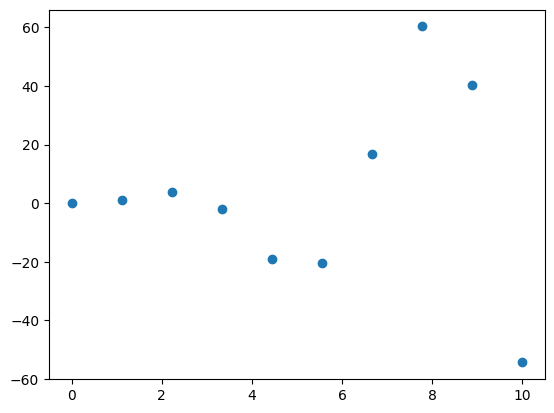

In [49]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)


In [50]:
from scipy.interpolate import interp1d

In [51]:
f = interp1d(x, y, kind = 'linear') #kind can be 'linear', 'cubic', 'quadratic' interpolation
x_dense = np.linspace(0, 10, 100) #here it means that 100 points between 0 to 10
y_dense = f(x_dense)

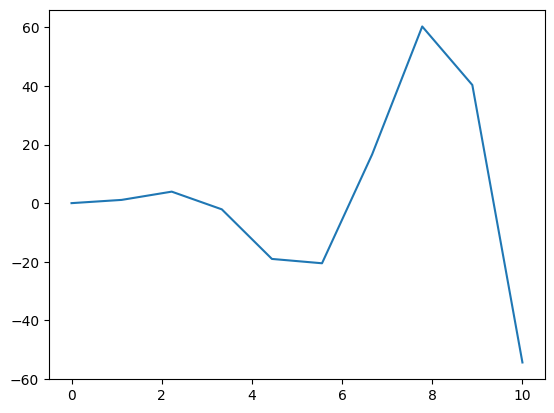

In [52]:
plt.plot(x_dense, y_dense)

In [53]:
f = interp1d(x, y, kind = 'cubic') #kind can be 'linear', 'cubic', 'quadratic' interpolation
x_dense = np.linspace(0, 10, 100) #here it means that 100 points between 0 to 10
y_dense = f(x_dense)

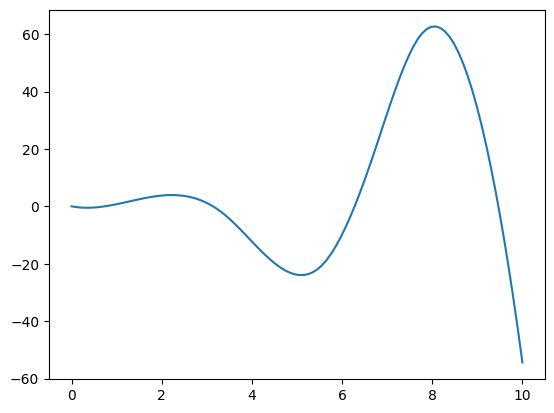

In [54]:
plt.plot(x_dense, y_dense) #cubic interpolation gives the smoothest curve

### Curve fitting


In [55]:
x_data = np.linspace(0, 10, 10)
y_data = 3.0 * x_data**2 + 2.0

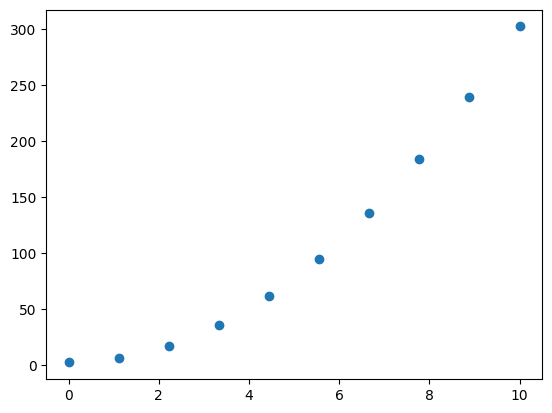

In [56]:
plt.scatter(x_data, y_data)

want to fit the data to the curve $y = ax^2 + b$. The main goal here is to determine the values of $a$ and $b$ to extrct something about the physical process

In [57]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0 = [2.0, 2.0]) #p0 is the initial guess for a and b

**popt → Optimal parameters**

This is an array of the best-fit values for the parameters in your function.

In the example, func(x, a, b, c) has 3 parameters (a, b, c), so popt might look like:

[2.05, 2.95, 5.10]
which are the best estimates for a, b, and c.

pcov → Covariance matrix of the parameters

This is a square matrix that gives an idea of the uncertainty (variance) and correlation between fitted parameters.

The diagonal elements of pcov are the variances of the parameters.

So the standard deviation (error) of each parameter is:

perr = np.sqrt(np.diag(pcov))


Example:

pcov =
[[0.02  0.001 -0.003]
 [0.001 0.04   0.002]
 [-0.003 0.002 0.01 ]]


Variance of a = 0.02 → std dev ≈ 0.14

Variance of b = 0.04 → std dev ≈ 0.20

Variance of c = 0.01 → std dev ≈ 0.10

In [58]:
popt

array([3., 2.])

### Special Function
Legendre Polynomials $P(x): satisfy(1-x^2)y^n + 2xy + l(l+1)y = 0$
- The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

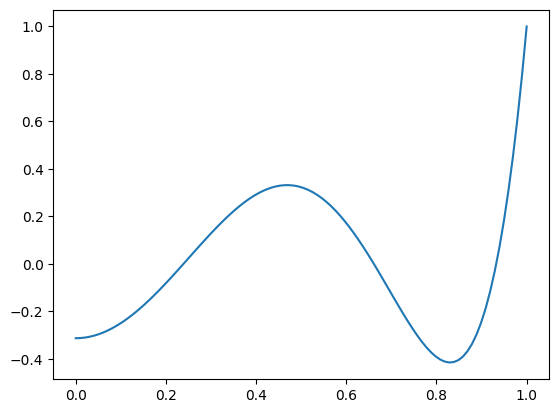

In [60]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

In [61]:
legendre(6)(x)

array([-0.3125    , -0.31183063, -0.30982498, -0.30649042, -0.30183921,
       -0.29588849, -0.28866022, -0.28018113, -0.27048269, -0.259601  ,
       -0.24757672, -0.234455  , -0.22028534, -0.20512149, -0.18902132,
       -0.17204669, -0.1542633 , -0.13574052, -0.1165512 , -0.09677155,
       -0.07648089, -0.05576147, -0.03469823, -0.01337862,  0.00810769,
        0.02966902,  0.05121194,  0.07264159,  0.09386188,  0.11477587,
        0.135286  ,  0.15529446,  0.17470346,  0.19341564,  0.21133433,
        0.228364  ,  0.24441054,  0.25938173,  0.27318756,  0.28574066,
        0.29695673,  0.30675493,  0.31505837,  0.32179447,  0.32689553,
        0.3302991 ,  0.33194851,  0.33179336,  0.32979001,  0.3259021 ,
        0.32010106,  0.31236669,  0.30268763,  0.29106199,  0.27749789,
        0.26201403,  0.24464031,  0.22541838,  0.20440232,  0.18165921,
        0.15726978,  0.13132908,  0.1039471 ,  0.07524946,  0.04537808,
        0.01449189, -0.01723251, -0.04960009, -0.08239669, -0.11

Bessel function $Ja(x)$: satisfy $x^2y^n + xy + (x^2 - a^2)y = 0$
- Laplace's equation in Polar Coordinates

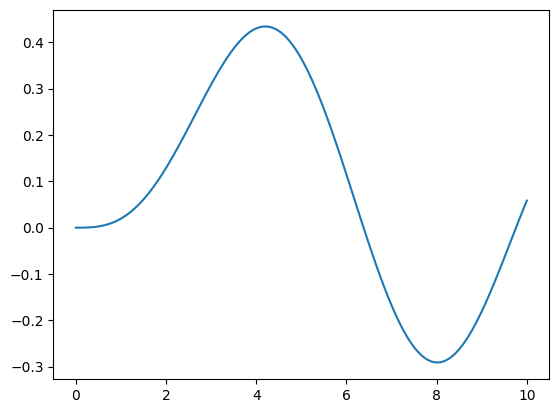

In [62]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3, x))
plt.show()

### Calculus
#### Differentiation

In [63]:
from scipy.optimize import approx_fprime
#Note: from scipy.misc import derivative   # ❌ no lon0ger available

approx_fprime signature is:

approx_fprime(xk, f, epsilon, *args)


where

xk = point (array-like)

f = function that takes xk

epsilon = small step size

That’s why you can’t pass dx=. You must pass it as the 3rd argument.
It is meant for computing the derivative at a single point, not over an entire array at once.

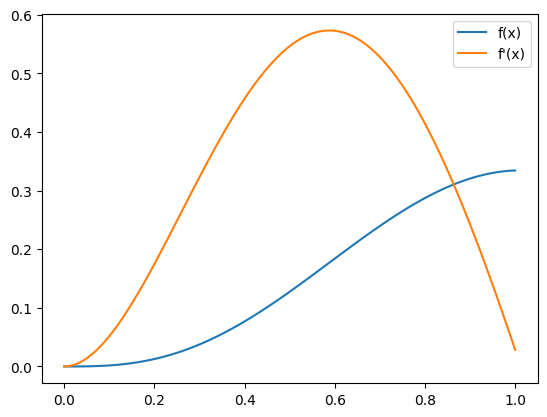

In [64]:
# function
def f(x):
    return x[0]**2 * np.sin(2*x[0]) * np.exp(-x[0])

# derivative wrapper
def numerical_derivative(x0):
    eps = np.sqrt(np.finfo(float).eps)
    return approx_fprime([x0], f, eps)[0]

# evaluate function and derivative on grid
x = np.linspace(0, 1, 100)
y = [f([xi]) for xi in x]
dy = [numerical_derivative(xi) for xi in x]

# plot
plt.plot(x, y, label="f(x)")
plt.plot(x, dy, label="f'(x)")
plt.legend()
plt.show()

#### Integration
- Single Integrals

$\int_0^1 x^2 \, sin(2x)e^ {-x} \, dx$

In [65]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

""""
- quad = Quadrature integration method.

It performs numerical integration of a function using adaptive algorithms (Gaussian quadrature).

Works for definite integrals: 

- integrand: defines the integrand function
lambda x: is a quick way to define an inline function (instead of writing def f(x): return ...).

Uses NumPy for sin and exp to handle math efficiently

- integral, integral_error = quad(integrand, 0, 1)

This runs the integration:

integral = the numerical value of the integral.

integral_error = an estimate of the numerical error (how much uncertainty in the calculation).

"""

'"\n- quad = Quadrature integration method.\n\nIt performs numerical integration of a function using adaptive algorithms (Gaussian quadrature).\n\nWorks for definite integrals: \n\n- integrand: defines the integrand function\nlambda x: is a quick way to define an inline function (instead of writing def f(x): return ...).\n\nUses NumPy for sin and exp to handle math efficiently\n\n- integral, integral_error = quad(integrand, 0, 1)\n\nThis runs the integration:\n\nintegral = the numerical value of the integral.\n\nintegral_error = an estimate of the numerical error (how much uncertainty in the calculation).\n\n'

Double Integrals

$\int_0^1 \int_{-x}^{x^2} sin(x+y^2) \, dydx$

In [66]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y) 


In [67]:
integral

0.315802507240474

In [68]:
from scipy.integrate import nquad

Differential Equations

**First order ODEs**

Air friction about differential equations $v' - \alpha v^2 + \beta = 0,\quad v(0) = 0$

In [69]:
from scipy.integrate import odeint

In [70]:
def dvdt(v, t):
    return 3*v**2 - 5 #setting alpha = 3 and beta = -5
v0 = 0

Solve differential equation

In [71]:
t = np.linspace(0, 1, 100) #np.linspace(start, stop, num)#creates 100 points between 0 and 1, evenly spaced.
sol = odeint (dvdt, v0, t)

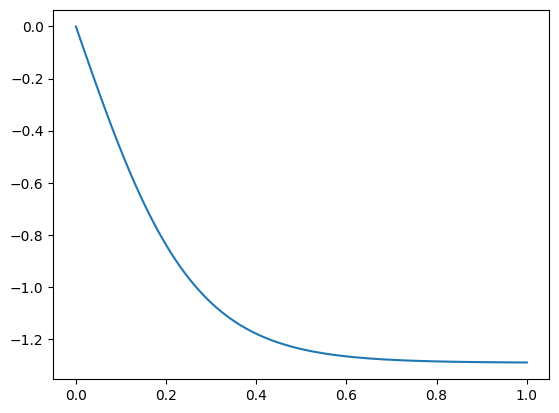

In [72]:
plt.plot(t, sol.T[0])

**Coupled first order ODEs**

$y_1 = y_2 + y_2^2 + 3x y_1(0) = 0$

$y'_2 = 3y_1 + y_2^3 -cos(x)  y_2  y_2(0)=0$

Letting $S = (y_1, y_2)$, we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The 

In [73]:
def dSdx(S, x):
    y1, y2 = S
    return [y1+y2**2+3*x, 3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S0 = [y1_0, y2_0]

In [74]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S0, x)

In [75]:
y1 = sol.T[0]
y2 = sol.T[1]

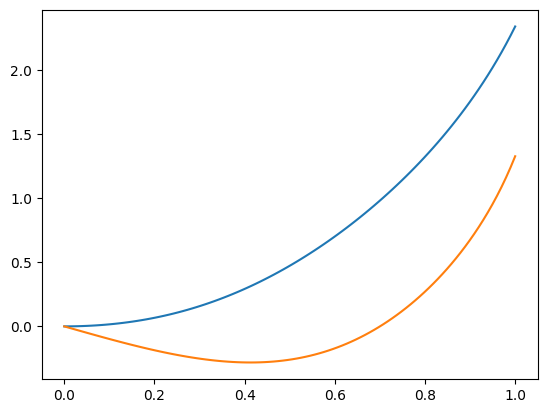

In [76]:
plt.plot(x, y1)
plt.plot(x, y2)